In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from matplotlib.patches import Patch

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore')

## Clustering Evaluation Function

In [24]:
def evaluate_clustering(X, labels, n_cluster, ax = None, title_suffix = ''):

    """
    Evaluate a clustering model based on silhoutte scores and the Davies-Bouldin index

    parameters:
    X(ndarray): Feature Matrix
    labels (array_like): Cluster labels assigned to each sample
    n_clusters(int): the number of clusters in the model
    ax: The subplot axes to plot on
    title_suffix (str): Optional suffix for plot titlec

    Returns:
    silhoutte score: Predicts how does the model perform (ranges -1 to 1)
    1--> model has done excellent
    0--> model did a moderate performance
    -1--> model has done the worst
    """

    if ax is None:
        ax = plt.gca() # Get the current axis if none is provided

    # Calculate silhoutte score:
    silhouette_avg =silhouette_score(X,labels)
    sample_silhouette_values = silhouette_samples(X, labels)


    # plot silhouette analysis on the provided axis
    unique_labels = np.unique(labels)
    colormap =cm.tab10

    color_dict = {label:colormap(float(label)/n_clusters) for label in unique_labels}
    y_lower = 10

    for i in unique_labels:
        ith_cluster_silhouette_values = sample_silhouette_values[labels ==i]
        ith_cluster_silhouette_values.sort()

        print(f"ith cluster silhouette values shape: {ith_cluster_silhouette_values.shape}")
        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        y_upper = y_lower + size_cluster_i


        color = color_dict[i]

        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor = color, edgecolor = color, alpha = 0.7)

        ax.text(-0.05, y_lower+0.5 * size_cluster_i, str(i))
        y_lower = y_upper+10

    ax.set_title(f'Silhouette Score for {title_suffix} \n' + 
                 f'Average Silhouette: {silhouette_avg:.2f}')
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster')
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlim([-0.25, 1])  # Set the x-axis range to [0, 1]

    ax.set_yticks([])

        
    

In [8]:
"""
def evaluate_clustering(X,labels, n_cluster, ax = None ):

    
    


    # avg silhoutte score
    if ax is None:
        ax = plt.gca()
    silhouette_avg = silhouette_score(X, labels)
    silhouette_score = silhouette_samples(X, labels)

    unique_labels = np.unique(labels)

    color = cm.tab10
    color_dict = {label: color(float(label)/n_cluster) for label in unique_labels}
    y_lower = 10

    # now for each unique label in the clusters, we would assign them a different color, and plot them.
    for i in unique_labels:

        # get their silhouette score and sort them
        y_lower = 10

        ith_silhouette_score = silhouette_score(labels ==i)
        ith_silhouette_score.sort()

        # now assign a color to the cluster
        color_code = color[i]

        cluster_size = ith_silhouette_score.shape[0]
        y_upper = y_lower + cluster_size
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_silhouette_score,
                        facecolor = color_code,edgecolor = color_code,
                        alpha = 0.7)

        ax.text(-0.05,y_lower + 0.5*cluster_size,str(i))
        y_lower = y_upper+10

        
"""

'\ndef evaluate_clustering(X,labels, n_cluster, ax = None ):\n\n    \n    \n\n\n    # avg silhoutte score\n    if ax is None:\n        ax = plt.gca()\n    silhouette_avg = silhouette_score(X, labels)\n    silhouette_score = silhouette_samples(X, labels)\n\n    unique_labels = np.unique(labels)\n\n    color = cm.tab10\n    color_dict = {label: color(float(label)/n_cluster) for label in unique_labels}\n    y_lower = 10\n\n    # now for each unique label in the clusters, we would assign them a different color, and plot them.\n    for i in unique_labels:\n\n        # get their silhouette score and sort them\n        y_lower = 10\n\n        ith_silhouette_score = silhouette_score(labels ==i)\n        ith_silhouette_score.sort()\n\n        # now assign a color to the cluster\n        color_code = color[i]\n\n        cluster_size = ith_silhouette_score.shape[0]\n        y_upper = y_lower + cluster_size\n        ax.fill_betweenx(np.arange(y_lower, y_upper),\n                        0, ith_silh

## Clustering Synthetic Data with four blobs to experiment with k-means clustering

ith cluster silhouette values shape: (126,)
ith cluster silhouette values shape: (132,)
ith cluster silhouette values shape: (104,)
ith cluster silhouette values shape: (138,)


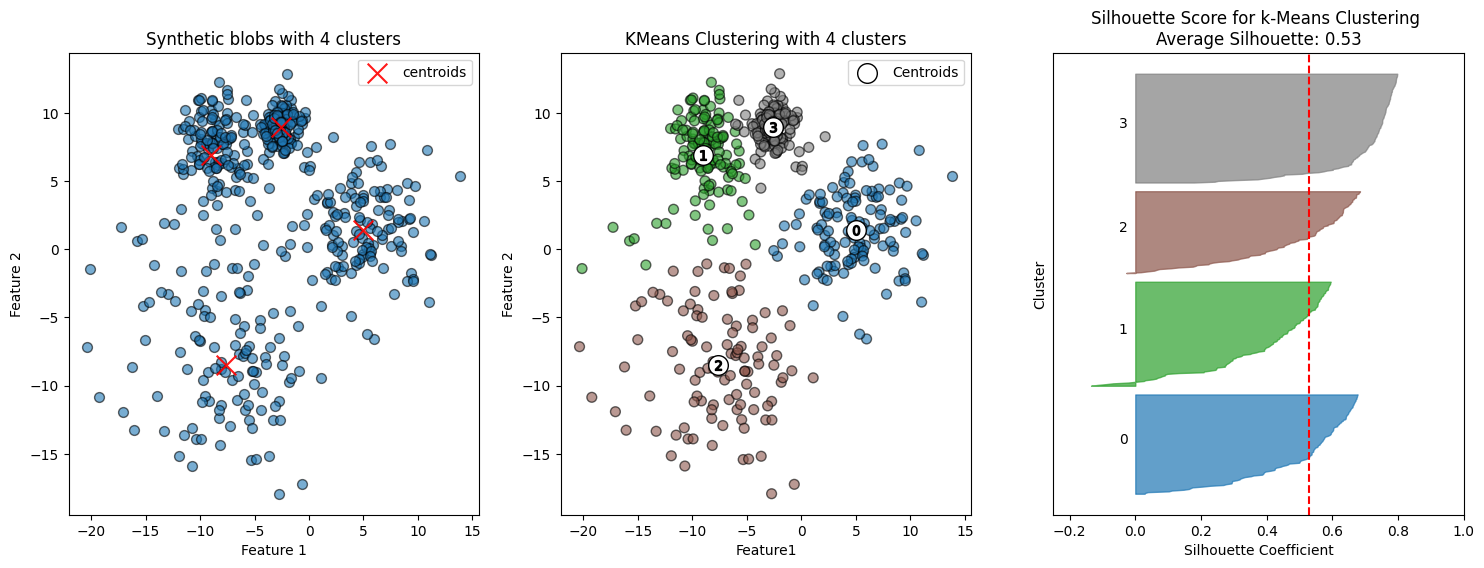

In [26]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = [1.0, 3,5,2], random_state =42)

n_clusters = 4
kmeans = KMeans(n_clusters =n_clusters, random_state = 42)
y_means = kmeans.fit_predict(X)

colormap = cm.tab10

# plot the blobs
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], s = 50, alpha = 0.6, edgecolor = 'k')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'r', marker = 'x', s = 200, alpha = 0.9, label= 'centroids')
plt.title(f'Synthetic blobs with {n_clusters} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()





colors = colormap(y_means.astype(float)/n_clusters)

plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1], c = colors, s = 50, alpha = 0.6, edgecolor = 'k')

# label the clusters
centers = kmeans.cluster_centers_
# Draw white circle at cluster centers
plt.scatter(
    centers[:,0],
    centers[:,1],
    marker = "o",
    c = 'white',
    alpha = 1,
    s = 200,
    edgecolor = 'k',
    label = 'Centroids'
    
)

# Label the cluster number
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker = '$%d$'%i, alpha = 1, s = 50, edgecolor = 'k')

plt.title(f'KMeans Clustering with {n_clusters} clusters')
plt.xlabel('Feature1')
plt.ylabel('Feature 2')
plt.legend()


# Evaluate the clustering
plt.subplot(1,3,3)
evaluate_clustering(X, y_means, n_clusters, title_suffix='k-Means Clustering')
plt.show()

In [16]:
centers

array([[ 4.9702268 ,  1.42039633],
       [-9.00848208,  6.9018064 ],
       [-7.61517055, -8.50511565],
       [-2.61664134,  8.9306011 ]])

## Cluster Stability

To assess stablility, we can measure inertia and repeatedly vary the random initialization 